In [18]:
import pandas as pd
from functools import reduce

In [19]:
cov_dfs = []
for submod in ['google', 'equal', 'ascmid', 'ascmax']:
    cov_df = pd.read_csv(f'/ihme/covid-19/deaths/dev/2020_04_11_Europe_new_cov/model_data_{submod}_21/Netherlands covariate.csv')
    cov_df = cov_df.loc[~cov_df['threshold_date'].isnull()]
    cov_df = cov_df.rename(index=str, columns={'cov_1w':submod})
    cov_dfs.append(cov_df[['Location', submod]])
cov_df = reduce(lambda x, y: pd.merge(x, y), cov_dfs)

In [22]:
cov_df.loc[cov_df['Location'].isin(['Denmark', 'Netherlands', 'Norway'])].to_csv('/ihme/homes/rmbarber/N_Euro_covs.csv', index=False)

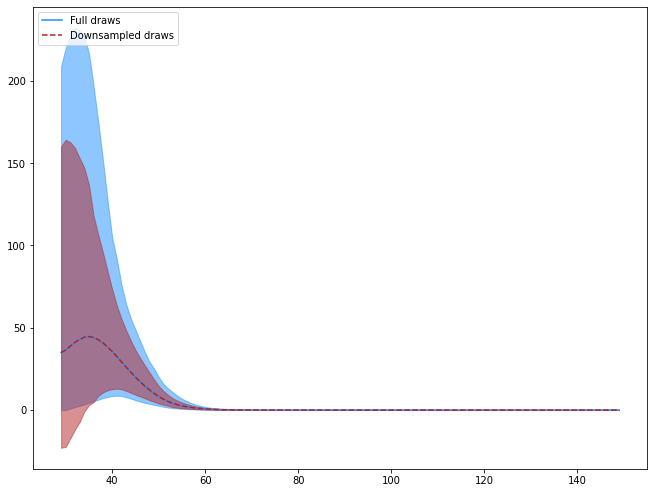

In [95]:
import os

import dill as pickle

import numpy as np
import pandas as pd

from scipy.signal import resample

import matplotlib.pyplot as plt


location_name = 'California'
location_id = '_527'
pop = 36.9e6
n_draws = 111

with open(f'/ihme/covid-19/deaths/prod/2020_04_13_US/model_data_equal_21/{location_name}/draws.pkl', 'rb') as fopen:
    draws = pickle.load(fopen)

orig_draws = np.exp(draws[location_id][1]) * pop
# ds_draws = np.arange(orig_draws.shape[0], step=orig_draws.shape[0]/n_draws)
# ds_draws = [int(i) for i in ds_draws]
# assert len(ds_draws) == n_draws, 'Draw length not correct.'
# downsample_draws = orig_draws[ds_draws]
downsample_draws = resample(orig_draws, n_draws, axis=0)
downsample_draws = downsample_draws[np.argsort(downsample_draws[:,-1]),:]

orig_draws = orig_draws[:,1:] - orig_draws[:,:-1]
downsample_draws = downsample_draws[:,1:] - downsample_draws[:,:-1]

plt.figure(figsize=(11, 8.5))
plt.fill_between(draws[location_id][0][1:],
                np.percentile(orig_draws, 2.5, axis=0),
                np.percentile(orig_draws, 97.5, axis=0),
                color='dodgerblue', alpha=0.5)
plt.plot(draws[location_id][0][1:],
         orig_draws.mean(axis=0), color='dodgerblue', label='Full draws')
plt.fill_between(draws[location_id][0][1:],
                np.percentile(downsample_draws, 2.5, axis=0),
                np.percentile(downsample_draws, 97.5, axis=0),
                color='firebrick', alpha=0.5)
plt.plot(draws[location_id][0][1:],
         downsample_draws.mean(axis=0), color='firebrick', label='Downsampled draws', linestyle='--')
plt.legend(loc=2)
plt.show()


In [88]:
?resample

Signature: resample(x, num, t=None, axis=0, window=None)
Docstring:
Resample `x` to `num` samples using Fourier method along the given axis.

The resampled signal starts at the same value as `x` but is sampled
with a spacing of ``len(x) / num * (spacing of x)``.  Because a
Fourier method is used, the signal is assumed to be periodic.

Parameters
----------
x : array_like
    The data to be resampled.
num : int
    The number of samples in the resampled signal.
t : array_like, optional
    If `t` is given, it is assumed to be the equally spaced sample
    positions associated with the signal data in `x`.
axis : int, optional
    The axis of `x` that is resampled.  Default is 0.
window : array_like, callable, string, float, or tuple, optional
    Specifies the window applied to the signal in the Fourier
    domain.  See below for details.

Returns
-------
resampled_x or (resampled_x, resampled_t)
    Either the resampled array, or, if `t` was given, a tuple
    containing the resampled a

In [1]:

google_df = pd.read_csv('/ihme/covid-19/deaths/dev/2020_04_13_US_mobility_closure_w/model_data_google_21/California covariate.csv')
descartes_df = pd.read_csv('/ihme/covid-19/deaths/dev/2020_04_13_US_mobility_closure_w/model_data_descartes_21/California covariate.csv')
safegraph_df = pd.read_csv('/ihme/covid-19/deaths/dev/2020_04_13_US_mobility_closure_w/model_data_safegraph_21/California covariate.csv')


In [2]:
google_df

,Location,Country/Region,threshold_date,ci_sd1,ci_sd2,ci_sd3,ci_psd1,ci_psd3,composite_1w,composite_2w,composite_3w,cov_1w,cov_2w,cov_3w
0,"Wuhan City, Hubei",China,2020-01-18,5.0,5,5.0,5.0,5.0,5.000000,NaN,NaN,1.000000,NaN,NaN
1,Alabama,United States of America,2020-03-25,10.0,-6,3.0,-5.0,-5.0,-2.940959,NaN,NaN,0.694578,NaN,NaN
2,Alaska,United States of America,2020-03-20,8.0,-4,8.0,4.0,-3.0,0.737558,NaN,NaN,0.836060,NaN,NaN
3,Arizona,United States of America,2020-03-22,8.0,-6,30.0,8.0,-2.0,4.381865,NaN,NaN,0.976226,NaN,NaN
4,Arkansas,United States of America,2020-03-23,29.0,-6,29.0,29.0,-4.0,10.241806,NaN,NaN,1.201608,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Thuringia,Germany,2020-03-17,5.0,0,35.0,5.0,-2.0,6.449773,NaN,NaN,1.055761,NaN,NaN
113,King and Snohomish Counties (excluding Life Ca...,United States of America,2020-02-29,23.0,11,25.0,11.0,16.0,14.969929,NaN,NaN,1.383459,NaN,NaN
114,"Other Counties, WA",United States of America,2020-03-13,10.0,0,12.0,-2.0,3.0,2.710473,NaN,NaN,0.911941,NaN,NaN
115,Wyoming,United States of America,2020-04-17,4.0,-29,4.0,-28.0,-29.0,-21.107947,NaN,NaN,-0.004152,NaN,NaN


In [3]:
descartes_df

,Location,Country/Region,threshold_date,ci_sd1,ci_sd2,ci_sd3,ci_psd1,ci_psd3,composite_1w,composite_2w,composite_3w,cov_1w,cov_2w,cov_3w
0,"Wuhan City, Hubei",China,2020-01-18,5.0,5,5.0,5.0,5.0,5.000000,NaN,NaN,1.000000,NaN,NaN
1,Alabama,United States of America,2020-03-25,10.0,-6,3.0,-5.0,-5.0,-0.753676,NaN,NaN,0.778705,NaN,NaN
2,Alaska,United States of America,2020-03-20,8.0,-4,8.0,4.0,-3.0,1.859244,NaN,NaN,0.879202,NaN,NaN
3,Arizona,United States of America,2020-03-22,8.0,-6,30.0,8.0,-2.0,5.956933,NaN,NaN,1.036805,NaN,NaN
4,Arkansas,United States of America,2020-03-23,29.0,-6,29.0,29.0,-4.0,12.402311,NaN,NaN,1.284704,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Thuringia,Germany,2020-03-17,5.0,0,35.0,5.0,-2.0,7.485294,NaN,NaN,1.095588,NaN,NaN
113,King and Snohomish Counties (excluding Life Ca...,United States of America,2020-02-29,23.0,11,25.0,11.0,16.0,17.030462,NaN,NaN,1.462710,NaN,NaN
114,"Other Counties, WA",United States of America,2020-03-13,10.0,0,12.0,-2.0,3.0,4.578782,NaN,NaN,0.983799,NaN,NaN
115,Wyoming,United States of America,2020-04-17,4.0,-29,4.0,-28.0,-29.0,-16.183824,NaN,NaN,0.185238,NaN,NaN


In [4]:
safegraph_df

,Location,Country/Region,threshold_date,ci_sd1,ci_sd2,ci_sd3,ci_psd1,ci_psd3,composite_1w,composite_2w,composite_3w,cov_1w,cov_2w,cov_3w
0,"Wuhan City, Hubei",China,2020-01-18,5.0,5,5.0,5.0,5.0,5.000000,NaN,NaN,1.000000,NaN,NaN
1,Alabama,United States of America,2020-03-25,10.0,-6,3.0,-5.0,-5.0,0.353107,NaN,NaN,0.821273,NaN,NaN
2,Alaska,United States of America,2020-03-20,8.0,-4,8.0,4.0,-3.0,3.214689,NaN,NaN,0.931334,NaN,NaN
3,Arizona,United States of America,2020-03-22,8.0,-6,30.0,8.0,-2.0,7.632768,NaN,NaN,1.101260,NaN,NaN
4,Arkansas,United States of America,2020-03-23,29.0,-6,29.0,29.0,-4.0,17.319209,NaN,NaN,1.473816,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Thuringia,Germany,2020-03-17,5.0,0,35.0,5.0,-2.0,8.262712,NaN,NaN,1.125489,NaN,NaN
113,King and Snohomish Counties (excluding Life Ca...,United States of America,2020-02-29,23.0,11,25.0,11.0,16.0,17.480226,NaN,NaN,1.480009,NaN,NaN
114,"Other Counties, WA",United States of America,2020-03-13,10.0,0,12.0,-2.0,3.0,4.881356,NaN,NaN,0.995437,NaN,NaN
115,Wyoming,United States of America,2020-04-17,4.0,-29,4.0,-28.0,-29.0,-13.878531,NaN,NaN,0.273903,NaN,NaN
